In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

# Reacciones y datos

In [2]:
#Constantes
me=9.11e-31
mp=1.67e-27
q=1.6e-19
kb=1.38e-23
Aeff_V=0.1

#Funciones para calcular las tasas de reaccion a partir de los vectores
def Heavy_t(htrr,T):
    hrr=[]
    for i in range (len(htrr)):
        s=np.double(0)
        for j in range (len(htrr[i])):
            s=s+htrr[i][j]*np.log(T)**j
        hrr.append(s)
    return hrr
def Reaction_rate(d,e):
    s=0
    for i in range (len(d)):
        s=s+d[i]*np.log(e)**i
    return np.exp(s)

#Vectores con los datos para las tasas de reaccion
a1rr=[-3.27139e1,1.35365e1,-5.7393,1.56315,-2.877e-1,3.48256e-2,-2.631976e-3,1.1195e-4,-2.039e-6]
a2rr=[-3.568e1,1.7334689e1,-7.7674,2.211579,-4.1698e-1,5.0882e-2,-3.832e-3,1.61286e-4,-2.893391e-6]
a3rr=[-1.78e1,2.278,-1.2668,4.296e-1,-9.6099e-2,1.3879e-2,-1.231e-3,6.04e-5,-1.247e-6]
a4rr=[-2.858e1,1.0385e1,-5.3838,1.95,-5.394e-1,1.007e-1,-1.161e-2,7.41162e-4,-2.001e-5]
a5rr=[-3.74619e1,1.559e1,-6.693,1.9817,-4.045e-1,5.35239e-2,-4.31745e-3,1.918e-4,-3.592e-6]
a6rr=[-3.834e1,1.426e1,-5.826,1.728,-3.598e-1,4.822e-2,-3.909e-3,1.739e-4,-3.252e-6]
a7rr=[-3.07e1,1.509e1,-7.349,2.321,-4.818e-1,6.389e-2,-5.16188e-3,2.304e-4,-4.345e-6]
a8rr=[-1.7002e1,-4.050e-1,1.019e-8,-1.6956e-8]
a9rr=[-1.670e1,-6.036e-1,-1.943e-8,-2.006e-7,2.963e-8,2.1342e-8]
a10rr=[[-2.095e1,-3.908e-1,-1.407e-1,-2.3302e-2],[-2.904e-1,5.612e-2,3.0341e-2,-3.656e-3],[-1.585e-1,7.312e-2,-1.768e-2,-8.362e-4],[-7.788e-2,5.829e-2,-5.71e-3,-4.779e-3]]
a11rr=[-2.81e1,1e1,-4.7719,1.467,-2.979e-1,3.8616e-2,-3.05e-3,1.33e-4,-2.4e-6]
a12rr=[-3.081e1,1.039e1,-4.2597,1.1812,-2.2775e-1,2.9e-2,-2.287e-3,1.004e-4,-1.8699e-6]
a13rr=[-3.3481997e1,1.372e1,-5.9226,1.709,-3.505e-1,4.834e-2,-4.1314e-3,1.948e-4,-3.854e-6]
a14rr=[-2.02e1,9.564e-1,-6.931e-1,1.67e-1,-3.23e-2,5.8386e-3,-8.58e-4,7.46e-5,-2.67e-6]
a15rr=[-3.454e1,1.4126e1,-6.0045,1.5895,-2.7758e-1,3.1527e-2,-2.2296e-3,8.89e-5,-1.524e-6]
a16rr=[-4.7943e1,2.629e1,-1.15e1,2.992,-4.95e-1,5.236e-1,-3.4374e-3,1.272e-4,-2.136e-6]
#Información de las reacciones
#Formato=['Nombre','Tipo','Reactivos[masa,carga,n]','Productos[masa,carga,n]','Perdida de energia (eV)','Datos de <sigmav>']
a1=['e+H=>2e+H+','ionization',[[me,-1,1],[mp,0,1]],[[me,-1,2],[mp,1,1]],1.43e1,a1rr]
a2=['e+H2=>2e+H2+','ionization',[[me,-1,1],[2*mp,0,1]],[[me,-1,2],[2*mp,1,1]],1.87e1,a2rr]
a3=['e+H2+=>e+H++H','dissociation',[[me,-1,1],[2*mp,1,1]],[[me,-1,1],[mp,1,1],[mp,0,1]],2.7,a3rr]
a4=['e+H2=>e+2H','dissociation',[[me,-1,1],[2*mp,0,1]],[[me,-1,1],[mp,0,2]],1.08e1,a4rr]
a5=['e+H2+=>2e+2H+','dissociation',[[me,-1,1],[2*mp,1,1]],[[me,-1,2],[mp,1,2]],1.79e1,a5rr]
a6=['e+H2=>2e+H++H','dissociation',[[me,-1,1],[2*mp,0,1]],[[me,-1,2],[mp,0,1],[mp,1,1]],2.11e1,a6rr]
a7=['e+H3+=>e+2H+H+','dissociation',[[me,-1,1],[3*mp,1,1]],[[me,-1,2],[mp,0,1],[mp,1,1]],1.65e1,a7rr]
a8=['e+H3+=>3H','attachment',[[me,-1,1],[3*mp,1,1]],[[mp,0,3]],0,a8rr]
a9=['e+H2+=>2H','attachment',[[me,-1,1],[2*mp,1,1]],[[mp,0,2]],0,a9rr]
a10=['H2+H2+=>H3++H','heavy',[[2*mp,0,1],[2*mp,1,1]],[[3*mp,1,1],[2*mp,0,1]],0,Heavy_t(a10rr,0.1)]
a11=['e+H=>e+H*','excitation',[[me,-1,1],[mp,0,1]],[[me,-1,1],[mp,0,1]],10.2,a11rr]
a12=['e+H2($X^1\Sigma_g^+$)=>e+H2*($B^1\Sigma_u^+2p\sigma$)','excitation',[[me,-1,1],[2*mp,1,1]],[[me,-1,1],[2*mp,1,1]],11.37,a12rr]
a13=['e+H2($X^1\Sigma_g^+$)=>e+H2*($C^1\Pi_u^+2p\pi$)','excitation',[[me,-1,1],[2*mp,1,1]],[[me,-1,1],[2*mp,1,1]],11.7,a13rr]
a14=['e+H2(v=0)=>e+H2*(v=1)','excitation',[[me,-1,1],[2*mp,1,1]],[[me,-1,1],[2*mp,1,1]],0.5,a14rr]
a15=['e+H2=>e+H+H*','dissociation',[[me,-1,1],[2*mp,0,1]],[[me,-1,1],[mp,0,2]],1.08e1,a15rr]
a16=['e+H2=>e+H*+H*','dissociation',[[me,-1,1],[2*mp,0,1]],[[me,-1,1],[mp,0,2]],1.08e1,a16rr]

#Vector con todas las reacciones
reactions=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15]

# Funciones

### Funciones secundarias

In [15]:
'''Crea la lista de especies ordenadas de menor a mayor masa.
En caso de misma masa estan ordenados en funcion de la carga'''
def Species_list(reactions):
    species=[]
    for reaction in reactions:
        for elem in reaction[2]:
            spc=elem[0:2]
            if spc not in species:
                species.append(spc)
        for elem in reaction[3]:
            spc=elem[0:2]
            if spc not in species:
                spc=elem[0:2]
                species.append(spc)
    species.sort()
    return(species)

'''Lista de iones positivos'''
def Ions(species_list):
    ions=[]
    for specie in species_list:
        if specie[1]>0:
            ions.append(specie)
    return ions 

'''Lista de especies neutras'''
def Neutrals(species_list):
    neutrals=[]
    for specie in species_list:
        if specie[1]==0:
            neutrals.append(specie)
    return neutrals      

'''Velocidad de Bohm'''
def Bohm(Te,M):
    return np.sqrt(Te/M*q*10000)

'''Tasa de recombinacion del Hidrogeno. Depende mucho de la geometria y composicion de la camara '''
def Recombination_rate(e,n0):
    gamma=0.05
    L=10
    R=3.1
    Dh=2.37e19/n0
    A0_2=1/(2.405/R)**2+(np.pi/L)**2
    vth=np.sqrt(8/np.pi*e*q*10000/mp*3/2) #*3/2 viene de la masa relativa entre hidrogeno atomico y molecular
    tau_rec=2*(2-gamma)/Aeff_V/gamma/vth+A0_2/Dh
    return 1/tau_rec

'''Ecuacion de neutralidad. Devuelve la densidad de carga total'''
def Neutrality(species_list,concentrations):
    s=0
    for i in range(len(species_list)):
        s+=species_list[i][1]*concentrations[i]
    return s

'''Ecuación de absorción de potencia. Devuelve la potencia que no se absorbe en el plasma.'''
def Power_absortion(reactions,conc,pwr,e):
    absorbed=0
    s_list=Species_list(reactions)
    sum_nub=0
    ions=Ions(s_list)
    for reaction in reactions:
        if reaction[1]=='excitation':
            reac=reaction[2]
            reac.sort() 
            specie=reac[1][0:2]#quiero la especie que no es el electron
            i=s_list.index(specie)
            absorbed+=conc[0]*conc[i]*Reaction_rate(reaction[5],e)*reaction[4]
        if reaction[1]=='ionization':
            reac=reaction[2]
            reac.sort()
            specie=reac[1][0:2]
            i=s_list.index(specie)
            absorbed+=conc[0]*conc[i]*Reaction_rate(reaction[5],e)*reaction[4]
        if reaction[1]=='elastic':
            reac=reaction[2]
            reac.sort() 
            specie=reac[1][0:2]
            i=s_list.index(specie)
            absorbed+=conc[0]*conc[i]*Reaction_rate(reaction[5],e)*3*me/specie[0]*e
        if reaction[1]=='dissociation':
            reac=reaction[2]
            reac.sort()
            specie1=reac[0][0:2]
            specie2=reac[1][0:2]
            i=s_list.index(specie1)
            j=s_list.index(specie2)
            absorbed+=conc[i]*conc[j]*Reaction_rate(reaction[5],e)*reaction[4]
    for ion in ions:
        i=s_list.index(ion)
        sum_nub+=conc[i]*Bohm(e,ion[0])
    Vs=-e*np.log(4*sum_nub/conc[0]*np.sqrt(np.pi*me/8/(e*q*10000)))
    absorbed+=(5/2*e+Vs)*sum_nub*Aeff_V
    absorbed=absorbed*q*1e6 #para poner en W/m^3
    return pwr-absorbed

'''Ecuaciones de balance de energias. Esta escrito para el caso del hidrogeno. '''
def Specie_balance(reactions,concentrations,e):
    species=Species_list(reactions)
    ions=Ions(species)
    neutrals=Neutrals(species)
    equations=np.zeros(len(species))
    n0=0
    G_L=np.zeros((len(species),len(species),len(species)))
    for reaction in reactions:
            reac1=reaction[2][0][0:2]
            reac2=reaction[2][1][0:2]
            i=species.index(reac1)
            j=species.index(reac2)
            if i>j:
                i,j=j,i
                reac1,reac2=reac2,reac1
            G_L[i,j,i]-=concentrations[i]*concentrations[j]*Reaction_rate(reaction[5],e)#pérdidas
            G_L[i,j,j]-=concentrations[i]*concentrations[j]*Reaction_rate(reaction[5],e)
            for l in range(len(reaction[3])):
                prod=reaction[3][l][0:2]
                n=reaction[3][l][2]
                k=species.index(prod)
                G_L[i,j,k]+=n*concentrations[i]*concentrations[j]*Reaction_rate(reaction[5],e)#ganancias
    for k in range(len(species)):
        equations[k]+=sum(sum(G_L[:,:,k]))# ganancias y perdidas de volumen de cada una de las especies
    for ion in ions:
        k=species.index(ion)
        equations[k]-=concentrations[k]*Bohm(e,ion[0])*Aeff_V# Perdidas de superficie
    #Esta parte es especifica del hidrogeno
    for neu in neutrals:
        i=species.index(neu)
        n0+=concentrations[i]
    h_index=species.index([mp,0])
    equations[h_index]-=concentrations[h_index]*Recombination_rate(e,n0)
    #Eliminar las ecuaciones de los electrones y H2
    h2_index=species.index([2*mp,0])
    equations=np.delete(equations,h2_index)
    equations=np.delete(equations,0)
    return equations
                 


### Funcion principal

In [4]:
def Eq_system(solution,reactions,pwr,n0):
    concentrations=[solution[0],solution[1],solution[2],n0,solution[3],solution[4]]
    species=Species_list(reactions)
    e=solution[5]
    neutrality_eq=[Neutrality(species,concentrations)]
    pwr_eq=[Power_absortion(reactions,concentrations,pwr,e)]
    species_eq=Specie_balance(reactions,concentrations,e)
    sys=np.append(species_eq,(neutrality_eq,pwr_eq))
    return sys

### Encontrar solucion

In [5]:
def Find_solution1(pwr,n):
    e0=1
    init=[1e12,1e14,1e12,1e12,1e12,e0]
    sol=fsolve(Eq_system,init,args=(reactions,pwr,n),full_output=1)
    converge=sol[2]
    while (converge!=1)&(e0<120):
        e0+=1
        init=[1e12,1e14,1e12,1e12,1e12,e0]
        sol=fsolve(Eq_system,init,args=(reactions,pwr,n),full_output=1)
        converge=sol[2]
    return sol

# ---------------------------------------------------------------

# Tasas de reacción 

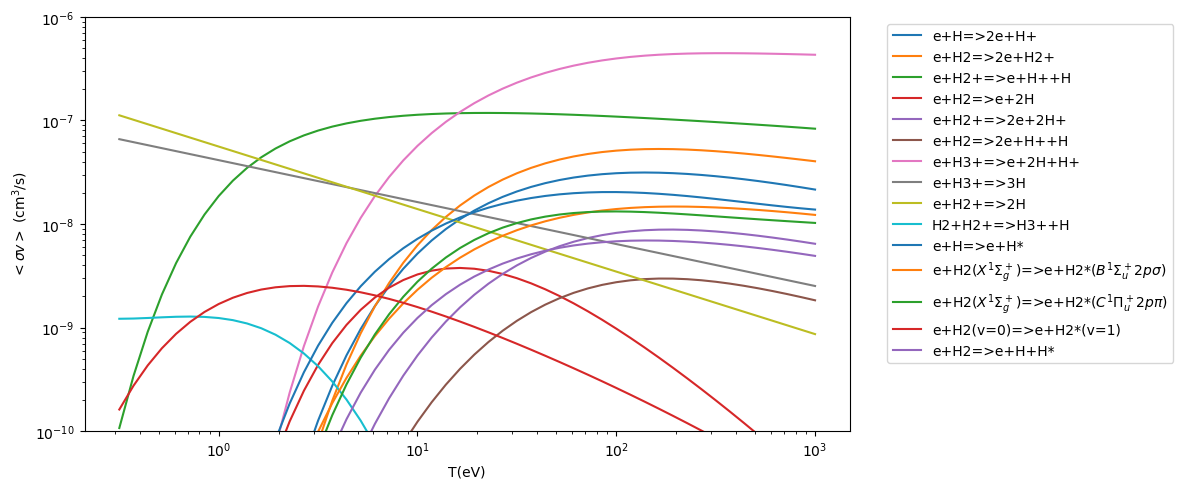

In [6]:
%matplotlib inline
figure=plt.figure(figsize=(12,5))
elog=np.logspace(-0.5,3)
for i in range (len(reactions)):
    r=reactions[i]
    plt.plot(elog,Reaction_rate(r[5],elog),label=r[0])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-10,1e-6)
plt.xlabel('T(eV)')
plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures\Cs.pdf')

# ----------------------------------------------------------------

# Solucion

### Solucion puntual

In [16]:
sol=Find_solution1(1e6,1.1e14)
sol[0]

array([4.73326587e+11, 3.87812934e+13, 1.68363781e+11, 2.86009738e+11,
       1.89530681e+10, 5.72543871e+00])

### Solucion 1D

In [18]:
def n_sweep(p0,n0,n1,N):
    ns=np.linspace(n0,n1,N)
    n,n1,n2,n3,nH,e=[],[],[],[],[],[]
    for ni in ns:
        sol=Find_solution1(p0,ni)
        n=np.append(n,ni)
        nH=np.append(nH,sol[0][1])
        n1=np.append(n1,sol[0][2])
        n2=np.append(n2,sol[0][3])
        n3=np.append(n3,sol[0][4])
        e=np.append(e,sol[0][5])
    return [n,nH,n1,n2,n3,n1+n2+n3,e]
def p_sweep(n0,p0,p1,N):
    ps=np.linspace(p0,p1,N)
    p,n1,n2,n3,nH,e=[],[],[],[],[],[]
    for pi in ps:
        sol=Find_solution1(pi,n0)
        p=np.append(p,pi)
        nH=np.append(nH,sol[0][1])
        n1=np.append(n1,sol[0][2])
        n2=np.append(n2,sol[0][3])
        n3=np.append(n3,sol[0][4])
        e=np.append(e,sol[0][5])
    return [n,nH,n1,n2,n3,n1+n2+n3,e]

Text(0.5, 0, '$n_0$ (cm$^{-3}$)')

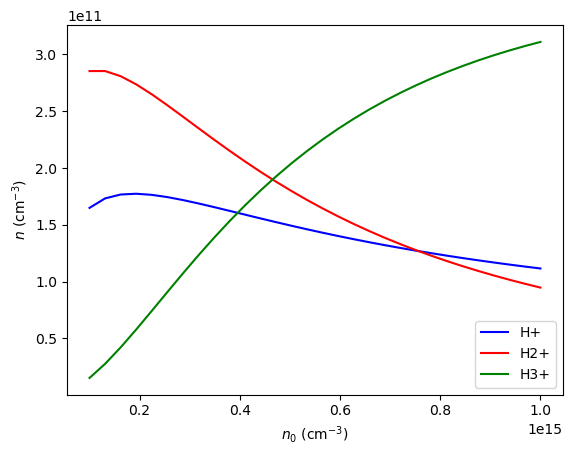

In [19]:
n,nH,n1,n2,n3,ne,e=n_sweep(1e6,1e14,1e15,30)
plt.plot(n,n1,color='blue',label='H+')
plt.plot(n,n2,color='red',label='H2+')
plt.plot(n,n3,color='green',label='H3+')
plt.legend()
plt.ylabel('$n$ (cm$^{-3}$)')
plt.xlabel('$n_0$ (cm$^{-3}$)')

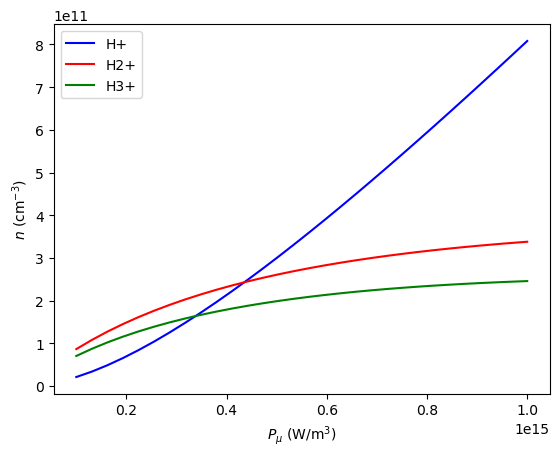

In [20]:
p,nH,n1,n2,n3,ne,e=p_sweep(4e14,3e5,3e6,30)
plt.plot(p,n1,color='blue',label='H+')
plt.plot(p,n2,color='red',label='H2+')
plt.plot(p,n3,color='green',label='H3+')
plt.ylabel('$n$ (cm$^{-3}$)')
plt.xlabel('$P_\mu$ (W/m$^{3}$)')
plt.legend()

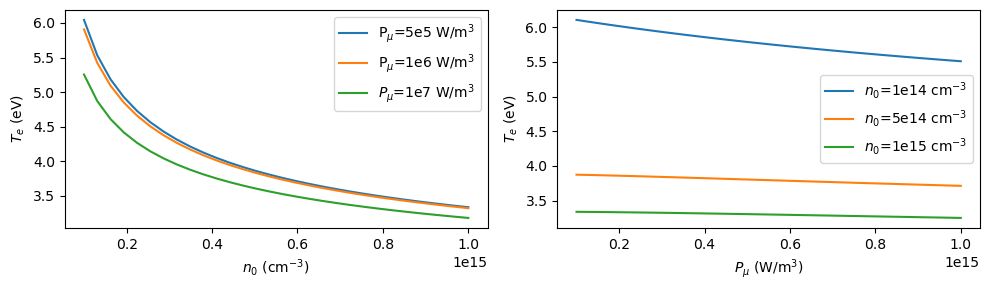

In [21]:
p01,p02,p03=5e5,1e6,5e6
n01,n02,n03=1e14,5e14,1e15
fig,ax=plt.subplots(1,2,figsize=(10,3))
n,nH,n1,n2,n3,ne,e=n_sweep(p01,1e14,1e15,30)
ax[0].plot(n,e,label='P$_\mu$=5e5 W/m$^{3}$')
n,nH,n1,n2,n3,ne,e=n_sweep(p02,1e14,1e15,30)
ax[0].plot(n,e,label='P$_\mu$=1e6 W/m$^{3}$')
n,nH,n1,n2,n3,ne,e=n_sweep(p03,1e14,1e15,30)
ax[0].plot(n,e,label='$P_\mu$=1e7 W/m$^{3}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n01,3e5,3e6,30)
ax[1].plot(p,e,label='$n_0$=1e14 cm$^{-3}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n02,3e5,3e6,30)
ax[1].plot(p,e,label='$n_0$=5e14 cm$^{-3}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n03,3e5,3e6,30)
ax[1].plot(p,e,label='$n_0$=1e15 cm$^{-3}$')

ax[0].set_ylabel('$T_e$ (eV)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$T_e$ (eV)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures\Te_lines.pdf')

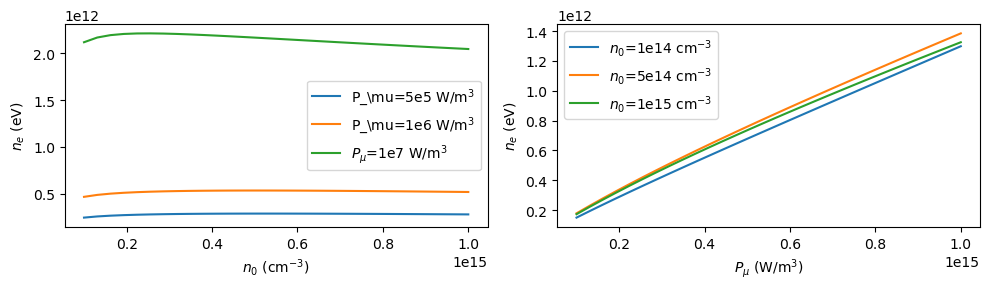

In [22]:
p01,p02,p03=5e5,1e6,5e6
n01,n02,n03=1e14,5e14,1e15
fig,ax=plt.subplots(1,2,figsize=(10,3))
n,nH,n1,n2,n3,ne,e=n_sweep(p01,1e14,1e15,30)
ax[0].plot(n,ne,label='P_\mu=5e5 W/m$^{3}$')
n,nH,n1,n2,n3,ne,e=n_sweep(p02,1e14,1e15,30)
ax[0].plot(n,ne,label='P_\mu=1e6 W/m$^{3}$')
n,nH,n1,n2,n3,ne,e=n_sweep(p03,1e14,1e15,30)
ax[0].plot(n,ne,label='$P_\mu$=1e7 W/m$^{3}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n01,3e5,3e6,30)
ax[1].plot(p,ne,label='$n_0$=1e14 cm$^{-3}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n02,3e5,3e6,30)
ax[1].plot(p,ne,label='$n_0$=5e14 cm$^{-3}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n03,3e5,3e6,30)
ax[1].plot(p,ne,label='$n_0$=1e15 cm$^{-3}$')

ax[0].set_ylabel('$n_e$ (eV)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$n_e$ (eV)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures/Ne_lines.pdf')

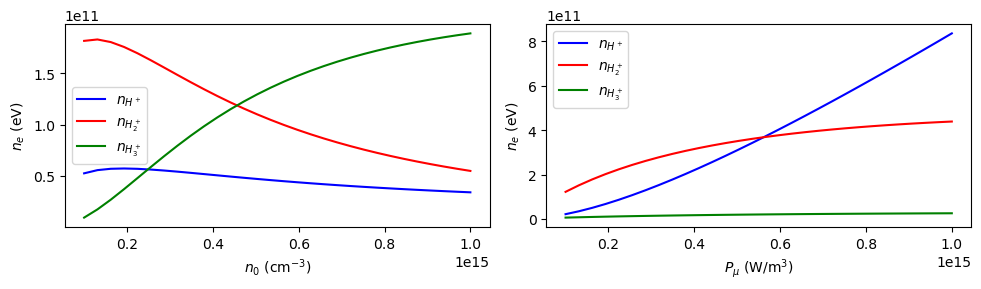

In [23]:
p0=2e6
n0=8e14
fig,ax=plt.subplots(1,2,figsize=(10,3))
n,nH,n1,n2,n3,ne,e=n_sweep(p01,1e14,1e15,30)
ax[0].plot(n,n1,color='blue',label='$n_{H^+}$')
ax[0].plot(n,n2,color='red',label='$n_{H_2^+}$')
ax[0].plot(n,n3,color='green',label='$n_{H_3^+}$')
p,nH,n1,n2,n3,ne,e=p_sweep(n01,3e5,3e6,30)
ax[1].plot(p,n1,color='blue',label='$n_{H^+}$')
ax[1].plot(p,n2,color='red',label='$n_{H_2^+}$')
ax[1].plot(p,n3,color='green',label='$n_{H_3^+}$')

ax[0].set_ylabel('$n_e$ (eV)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$n_e$ (eV)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures\species_lines.pdf')

### Solucion 2D

In [24]:
def TwoD_sol(p0i,p0f,n0i,n0f,xN,yN):
    p0=np.linspace(p0i,p0f,yN)
    n0=np.linspace(n0i,n0f,xN)
    pp,nn=np.meshgrid(p0,n0)
    nH2,nH,n1,n2,n3,e=np.empty((xN,yN)),np.empty((xN,yN)),np.empty((xN,yN)),np.empty((xN,yN)),np.empty((xN,yN)),np.empty((xN,yN))
    for j in range(p0.size):
        for i in range(n0.size):
            sol=Find_solution1(p0[j],n0[i])
            nH2[i,j]=n0[i]
            nH[i,j]=sol[0][1]
            n1[i,j]=sol[0][2]
            n2[i,j]=sol[0][3]
            n3[i,j]=sol[0][4]
            e[i,j]=sol[0][5]   
    return [nn,pp,nH2,nH,n1,n2,n3,n1+n2+n3,e]
        
def zonas(n1array,n2array,n3array):
    N_mayoritario=np.empty((n1array.shape[0],n1array.shape[1]))
    N_mayoritario[:]=np.nan
    limites=np.empty((n1array.shape[0],n1array.shape[1]))
    limites[:]=np.nan
    for i in range (n1array.shape[0]):
        for j in range (n1array.shape[1]):
            if (n1array[i,j]>n2array[i,j])&(n1array[i,j]>n3array[i,j]):
                N_mayoritario[i,j]=1
            if (n2array[i,j]>n1array[i,j])&(n2array[i,j]>n3array[i,j]):
                N_mayoritario[i,j]=2
            if (n3array[i,j]>n2array[i,j])&(n3array[i,j]>n1array[i,j]):
                N_mayoritario[i,j]=3
    for i in range(N_mayoritario.shape[0]-1):
        for j in range(N_mayoritario.shape[1]-1):
            if (N_mayoritario[i,j]!=N_mayoritario[i+1,j])|(N_mayoritario[i,j]!=N_mayoritario[i,j+1]):
                limites[i,j]=1
    return [N_mayoritario,limites]

In [25]:
nn,pp,nH2,nH,n1,n2,n3,ne,e=TwoD_sol(1e5,3e6,1e14,8e14,100,100)
N_mayoritario,limites=zonas(n1,n2,n3)

In [27]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10

#Species
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,n1,alpha=0.1,s=2,color='blue',label='H+')
ax.scatter(nn,pp,n2,alpha=0.1,s=2,color='red',label='H2+')
ax.scatter(nn,pp,n3,alpha=0.1,s=2,color='green',label='H3+')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.savefig('Figures/3D_species.pdf')

#Species
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.scatter(nn,pp,nH2,alpha=0.5,label='H2')
ax.scatter(nn,pp,nH,s=2,alpha=0.5,label='H')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{-3}$)')
ax.legend()
plt.tight_layout()

#T_e
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,e,alpha=0.5,s=2,label='$T_e$ (eV)')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.tight_layout()
plt.legend()
plt.savefig('Figures/3D_Te.pdf')

#n_e
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,n1+n2+n3,alpha=0.5,s=2,label='$n_e$ (cm$^{-3}$)')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.tight_layout()
plt.legend()
plt.savefig('Figures/3D_ne.pdf')

#Dissociation degree
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,nH/(nH+2*nH2),alpha=0.5,s=2,label='Dissociation_degree')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{-3}$)')
ax.legend()
plt.tight_layout()
plt.savefig('Figures/3D_dissociation.pdf')


N_mayoritario,limites=zonas(n1,n2,n3)
#plt.scatter(nn.flatten(),pp.flatten(),c=N_mayoritario.flatten())



ModuleNotFoundError: No module named 'ipympl'

# ------------------------------------------------------------------------------------

In [ ]:
import matplotlib.colors as colors
colorsList = ['blue','red','green']
CustomCmap = colors.ListedColormap(colorsList)
bounds = np.array([0.5,1.5,2.5,3.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(nn.flatten(),pp.flatten(),c=N_mayoritario.flatten().T,cmap=CustomCmap,norm=norm)
plt.xlim([1e14,8e14])
plt.ylim([1e5,3e6])
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{-3}$)')
plt.savefig('Figures/Predominant_map.pdf')

In [ ]:
import matplotlib.colors as colors
Blue = colors.ListedColormap(['blue'])


plt.figure(figsize=(8,4))
plt.scatter(nn.flatten(),pp.flatten(),c=limites.flatten().T,cmap=Blue)
plt.xlim([1e14,8e14])
plt.ylim([1e5,3e6])
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{-3}$)')
plt.savefig('Figures/Predominant_map.pdf')

### Contribucion de cada reaccion para la generacion de una especie

In [ ]:
def Contributions(reactions,specie,concentrations,e):#solution:[ne,nH,nH+,nH2+,nH3+,e]
    species=Species_list(reactions)
    k=species.index(specie)
    names=[]
    values=[]
    for reaction in reactions:
        reac1=reaction[2][0][0:2]
        reac2=reaction[2][1][0:2]
        i=species.index(reac1)
        j=species.index(reac2)
        value=0
        for spc in reaction[3]:
            prod=spc[0:2]
            if specie==prod:
                value=+concentrations[i]*concentrations[j]*Reaction_rate(reaction[5],e)
        for spc in reaction[2]:
            reac=spc[0:2]
            if specie==reac:
                value-=concentrations[i]*concentrations[j]*Reaction_rate(reaction[5],e)
        if value!=0:
            names.append(reaction[0])
            values.append(value)
    return [names,values]

In [ ]:
N=30
sol0=Find_solution1(3e5,4e14)[0]
concentrations=[sol0[0],sol0[1],sol0[2],n0,sol0[3],sol0[4]]
e=sol0[5]
names0,value0=Contributions(reactions,[mp,0],concentrations,e)
values0_NS=np.zeros((N,len(names0)))
values0_PS=np.zeros((N,len(names0)))
names1,value1=Contributions(reactions,[mp,1],concentrations,e)
values1_NS=np.zeros((N,len(names1)))
values1_PS=np.zeros((N,len(names1)))
names2,value2=Contributions(reactions,[2*mp,1],concentrations,e)
values2_NS=np.zeros((N,len(names2)))
values2_PS=np.zeros((N,len(names2)))
names3,value3=Contributions(reactions,[3*mp,1],concentrations,e)
values3_NS=np.zeros((N,len(names3)))
values3_PS=np.zeros((N,len(names3)))
'''Power sweep'''
n0_PS=4e14
p0_PS=np.linspace(3e5,3e6,N)
for i in range(p0_PS.size):
    sol=Find_solution1(p0_PS[i],n0_PS)[0]
    concentrations=[sol[0],sol[1],sol[2],n0,sol[3],sol[4]]
    e=sol[5]
    value0=Contributions(reactions,[mp,0],concentrations,e)[1]
    values0_PS[i]=value0
    value1=Contributions(reactions,[mp,1],concentrations,e)[1]
    values1_PS[i]=value1
    value2=Contributions(reactions,[2*mp,1],concentrations,e)[1]
    values2_PS[i]=value2
    value3=Contributions(reactions,[3*mp,1],concentrations,e)[1]
    values3_PS[i]=value3
'''N sweep'''
p0_NS=1e6
n0_NS=np.linspace(1e14,2e15,N)
for i in range(n0_NS.size):
    sol=Find_solution1(p0_NS,n0_NS[i])[0]
    concentrations=[sol[0],sol[1],sol[2],n0_NS[i],sol[3],sol[4]]
    e=sol[5]
    value0=Contributions(reactions,[mp,0],concentrations,e)[1]
    values0_NS[i]=value0
    value1=Contributions(reactions,[mp,1],concentrations,e)[1]
    values1_NS[i]=value1
    value2=Contributions(reactions,[2*mp,1],concentrations,e)[1]
    values2_NS[i]=value2
    value3=Contributions(reactions,[3*mp,1],concentrations,e)[1]
    values3_NS[i]=value3

In [ ]:
%matplotlib inline
'''Reactions involving H+'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
for i in range (values0_PS[0,:].size):
    ax[1].plot(p0_PS,abs(values0_PS[:,i]),label=names0[i])
for i in range (values0_NS[0,:].size):
    ax[0].plot(n0_NS,abs(values0_NS[:,i]),label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Contributions_h.pdf')


In [ ]:
%matplotlib inline
'''Reactions involving H+'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
for i in range (values1_PS[0,:].size):
    ax[1].plot(p0_PS,abs(values1_PS[:,i]),label=names0[i])
for i in range (values1_NS[0,:].size):
    ax[0].plot(n0_NS,abs(values1_NS[:,i]),label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Contributions_h+.pdf')

In [ ]:
%matplotlib inline
'''Reactions involving H2+'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
for i in range (values2_PS[0,:].size):
    ax[1].plot(p0_PS,abs(values2_PS[:,i]),label=names2[i])
for i in range (values2_NS[0,:].size):
    ax[0].plot(n0_NS,abs(values2_NS[:,i]),label=names2[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Contributions_h2+.pdf')

In [ ]:
%matplotlib inline
'''Reactions involving H2+'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
for i in range (values3_PS[0,:].size):
    ax[1].plot(p0_PS,abs(values3_PS[:,i]),label=names3[i])
for i in range (values3_NS[0,:].size):
    ax[0].plot(n0_NS,abs(values3_NS[:,i]),label=names3[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('|<$\sigma$v>|')
ax[0].set_xlabel('P$_\mu$(W/m$^3$)')
ax[0].set_ylabel('|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Contributions_h3+.pdf')

In [ ]:
Np=30
Nn=30

p0=np.linspace(3e5,3e6,Np)
n0=np.linspace(1e14,1e15,Nn)
sol0=Find_solution1(p0[0],n0[0])[0]
concentrations=[sol0[0],sol0[1],sol0[2],1e14,sol0[3],sol0[4]]
e=sol0[5]



names0,value0=Contributions(reactions,[mp,0],concentrations,e)
values0=np.zeros((Np,Nn,len(names0)))

names1,value1=Contributions(reactions,[mp,1],concentrations,e)
values1=np.zeros((Np,Nn,len(names1)))

names2,value2=Contributions(reactions,[2*mp,1],concentrations,e)
values2=np.zeros((Np,Nn,len(names2)))

names3,value3=Contributions(reactions,[3*mp,1],concentrations,e)
values3=np.zeros((Np,Nn,len(names3)))

for i in range(Np):
    for j in range(Nn):
        sol=Find_solution1(p0[i],n0[j])[0]
        concentrations=[sol[0],sol[1],sol[2],n0[j],sol[3],sol[4]]
        e=sol[5]

        value0=Contributions(reactions,[mp,0],concentrations,e)[1]
        values0[i,j]=value0

        value1=Contributions(reactions,[mp,1],concentrations,e)[1]
        values1[i,j]=value1

        value2=Contributions(reactions,[2*mp,1],concentrations,e)[1]
        values2[i,j]=value2

        value3=Contributions(reactions,[3*mp,1],concentrations,e)[1]
        values3[i,j]=value3

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
gridx,gridy=np.meshgrid(n0,p0)

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values0[0,0,:].size):
    ax.scatter(gridx,gridy,np.log10(abs(values0[:,:,i])),label=names0[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H generation')

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values1[0,0,:].size):
    ax.scatter(gridx,gridy,np.log10(abs(values1[:,:,i])),label=names1[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H+ generation')

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values2[0,0,:].size):
    ax.scatter(gridx,gridy,np.log10(abs(values2[:,:,i])),label=names2[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H2+ generation')

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values3[0,0,:].size):
    ax.scatter(gridx,gridy,np.log10(abs(values3[:,:,i])),label=names3[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H3+ generation')

# -----------------------------------------------------------


### Absorcion de energia

In [ ]:
def Absortion(reactions,conc,e):
    absorbed=0
    s_list=Species_list(reactions)
    names=[]
    values=[]
    for reaction in reactions:
        if reaction[1]=='excitation':
            reac=reaction[2]
            reac.sort() 
            specie=reac[1][0:2]#quiero la especie que no es el electron
            i=s_list.index(specie)
            names.append(reaction[0])
            values.append(conc[0]*conc[i]*Reaction_rate(reaction[5],e)*reaction[4])
            absorbed+=conc[0]*conc[i]*Reaction_rate(reaction[5],e)*reaction[4]
        if reaction[1]=='ionization':
            reac=reaction[2]
            reac.sort()
            specie=reac[1][0:2]
            i=s_list.index(specie)
            absorbed+=conc[0]*conc[i]*Reaction_rate(reaction[5],e)*reaction[4]
            names.append(reaction[0])
            values.append(conc[0]*conc[i]*Reaction_rate(reaction[5],e)*reaction[4])
        if reaction[1]=='elastic':
            reac=reaction[2]
            reac.sort() 
            specie=reac[1][0:2]
            i=s_list.index(specie)
            absorbed+=conc[0]*conc[i]*Reaction_rate(reaction[5],e)*3*me/specie[0]*e
            names.append(reaction[0])
            values.append(conc[0]*conc[i]*Reaction_rate(reaction[5],e)*3*me/specie[0]*e)
        if reaction[1]=='dissociation':
            reac=reaction[2]
            reac.sort()
            specie1=reac[0][0:2]
            specie2=reac[1][0:2]
            i=s_list.index(specie1)
            j=s_list.index(specie2)
            absorbed+=conc[i]*conc[j]*Reaction_rate(reaction[5],e)*reaction[4]
            names.append(reaction[0])
            values.append(conc[i]*conc[j]*Reaction_rate(reaction[5],e)*reaction[4])
    return [names,values]


In [ ]:
n0=4e14
N=30
p0=np.linspace(3e5,3e6,N)
sol0=Find_solution1(3e5,n0)[0]
concentrations=[sol0[0],sol0[1],sol0[2],n0,sol0[3],sol0[4]]
e=sol0[5]

names0,value0=Absortion(reactions,concentrations,e)
values0=np.zeros((N,len(names0)))
values1=np.zeros((N,len(names0)))

for i in range(p0.size):
    sol=Find_solution1(p0[i],n0)[0]
    concentrations=[sol[0],sol[1],sol[2],n0,sol[3],sol[4]]
    e=sol[5]
    
    value0=Absortion(reactions,concentrations,e)[1]
    values0[i]=value0


n0=np.linspace(1e14,1e15,N)
p1=1e6
for i in range(n0.size):
    sol=Find_solution1(p1,n0[i])[0]
    concentrations=[sol[0],sol[1],sol[2],n0[i],sol[3],sol[4]]
    e=sol[5]
    
    value1=Absortion(reactions,concentrations,e)[1]
    values1[i]=value1
    

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
for i in range(len(names0)):
    ax[1].plot(n0,values1[:,i],label=names0[i])
for i in range(len(names0)):
    ax[0].plot(p0,values0[:,i],label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Power_absortion.pdf')

In [ ]:
for i in range(len(names0)):
    plt.plot(n0,values1[:,i],label=names0[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('p$_\mu$')
plt.yscale('log')